In [ ]:
pip install fastai --upgrade

     |████████████████████████████████| 194kB 6.7MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.vision.all import *
import os
import PIL
import numpy as np
import pandas as pd

In [ ]:
import zipfile
from zipfile import ZipFile
filename = 'archive.zip'
with ZipFile(filename,'r') as zip:
  zip.extractall()

In [ ]:
PATH="Alzheimer_s Dataset/"
sz=224
bs=58

In [ ]:
## get_image_files helps us get all the files inside a subfolder
fnames = get_image_files(PATH)
## creating an empty DataBlock object
dblock = DataBlock()

## converting the DataBlocks to DataSets
dsets = dblock.datasets(fnames)
## let look at one of the label names
parent_label(fnames[0])

'ModerateDemented'

In [ ]:
lbl_dict = dict(
    MildDemented='mildDem',
    ModerateDemented='moderateDem',
    NonDemented='nonDem',
    VeryMildDemented='verymildDem'
)

In [ ]:
def label_func(fname):
    return lbl_dict[parent_label(fname)]

In [ ]:
dblock = DataBlock(get_items = get_image_files,
                   get_y     = label_func)

dsets = dblock.datasets(PATH)
dsets.train[0]

(Path('Alzheimer_s Dataset/train/NonDemented/nonDem1434.jpg'), 'nonDem')

In [ ]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func)

dsets = dblock.datasets(PATH)
dsets.train[0]

(PILImage mode=RGB size=176x208, TensorCategory(3))

In [ ]:
dsets.vocab

['mildDem', 'moderateDem', 'nonDem', 'verymildDem']

In [ ]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = GrandparentSplitter())

dsets = dblock.datasets(PATH)
dsets.train[0]

(PILImage mode=RGB size=176x208, TensorCategory(1))

In [ ]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = GrandparentSplitter(),
                   item_tfms = RandomResizedCrop(128, min_scale=0.35), 
                   batch_tfms=Normalize.from_stats(*imagenet_stats))

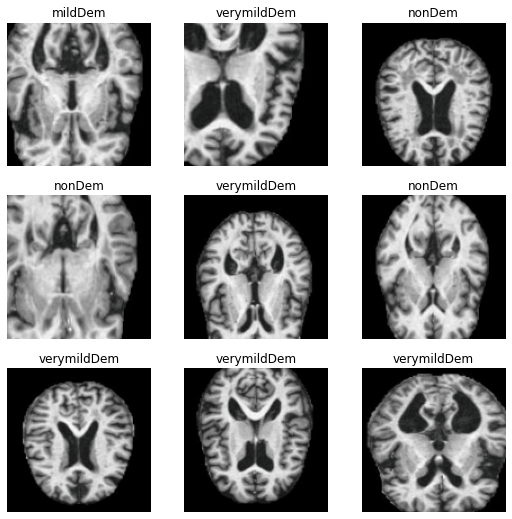

In [ ]:
dls = dblock.dataloaders(PATH)
dls.show_batch()

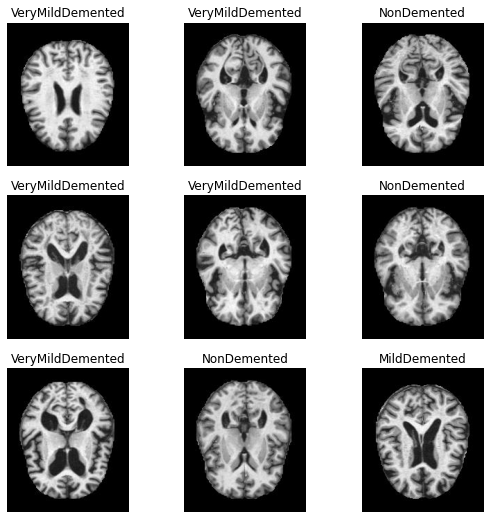

In [ ]:
data = ImageDataLoaders.from_folder(PATH, valid_pct=0.2,size=sz,bs=bs)
data.show_batch()
precompute=False)
learn.fit(0.01, 2)

epoch,train_loss,valid_loss,accuracy,time
0,1.683205,1.205747,0.558594,11:47


epoch,train_loss,valid_loss,accuracy,time
0,0.814171,0.692600,0.717188,13:14
1,0.676068,0.637223,0.749219,13:15
2,0.488375,0.536463,0.777344,13:20
3,0.326222,0.478125,0.817969,13:14
4,0.225003,0.444967,0.825000,13:13
5,0.166903,0.443505,0.830469,13:12


ModuleAttributeError: ignored

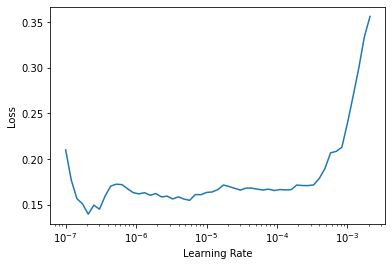

In [ ]:
wd=1e-2

mobilenet_split = lambda m: (m[0][0][10], m[1])
arch  = torchvision.models.mobilenet_v2
learn = cnn_learner(data,arch, cut=-1,  wd=wd, metrics=accuracy)
learn.fine_tune(6)
learn.lr_find();


ModuleAttributeError: ignored

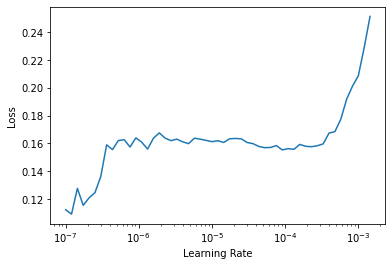

In [ ]:
learn.lr_find();
learn.recorder.plot();

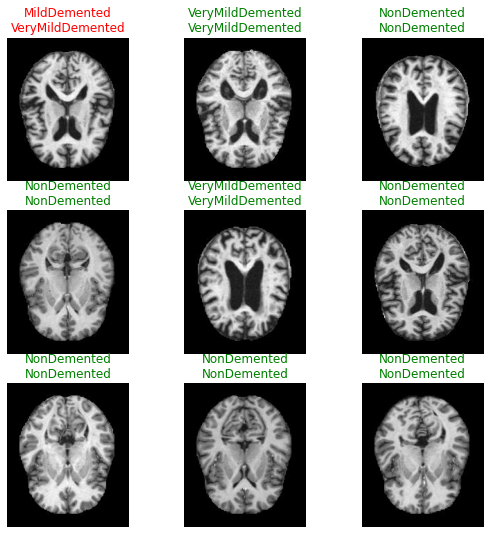

In [ ]:
learn.show_results()

In [ ]:
interp = Interpretation.from_learner(learn)

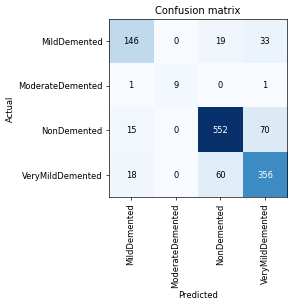

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

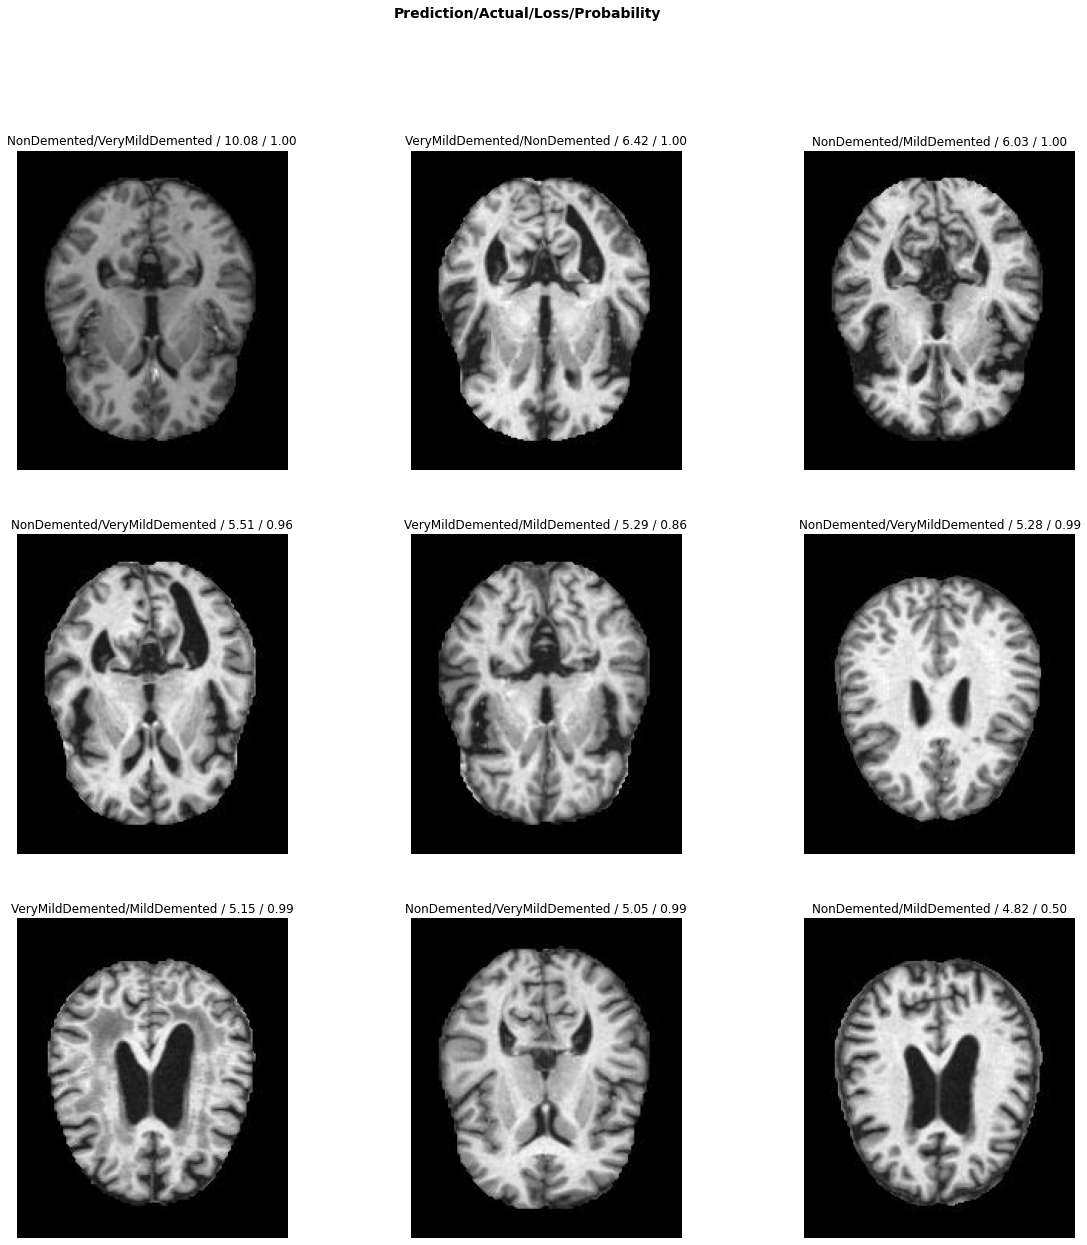

In [ ]:
interp.plot_top_losses(9, figsize=(20,20))
#predicted/actual/loss/probability

In [ ]:
learn.model_dir = "/kaggle/working"
learn.save("alzheimers")

Path('/kaggle/working/alzheimers.pth')

Text(0.5, 1.0, 'Prediction : MildDemented\nAccuracy : 49.05 %')

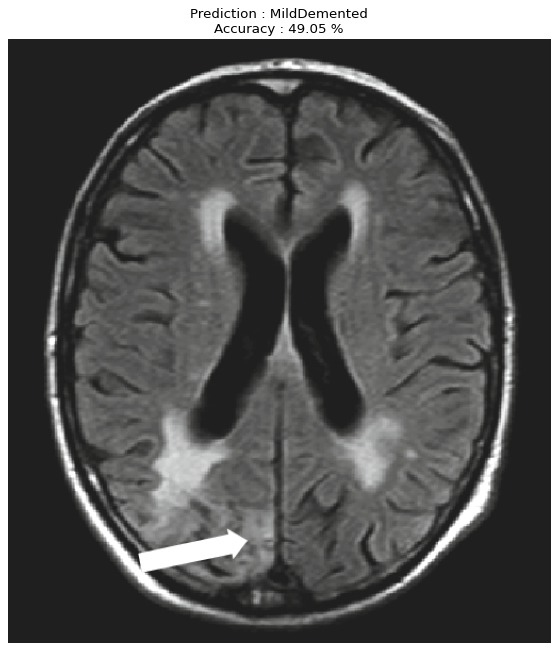

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
path = '4ee4c494df07ac6c3ecd9b2c622c75_gallery.png'
pred = learn.predict(path)
test_img = Image.open(path)
plt.imshow(test_img)
plt.axis("off")
accuracy_rate = np.round(max(pred[2]).item()*100.0,2)
plt.title("Prediction : {}\nAccuracy : {} %".format(pred[0],accuracy_rate))

Text(0.5, 1.0, 'Prediction : MildDemented\nAccuracy : 71.76 %')

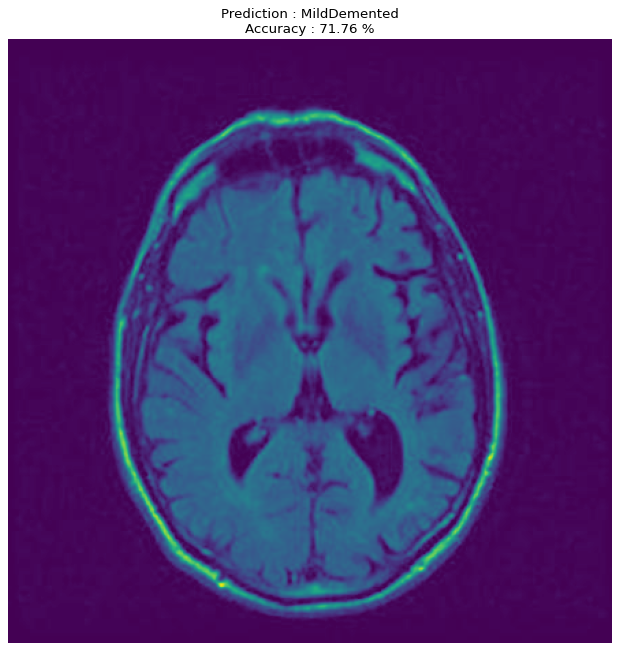

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
path = '6e448d573c0627a5630a38b8f661a9_gallery.jpg'
pred = learn.predict(path)
test_img = Image.open(path)
plt.imshow(test_img)
plt.axis("off")
accuracy_rate = np.round(max(pred[2]).item()*100.0,2)
plt.title("Prediction : {}\nAccuracy : {} %".format(pred[0],accuracy_rate))

Text(0.5, 1.0, 'Prediction : NonDemented\nAccuracy : 58.19 %')

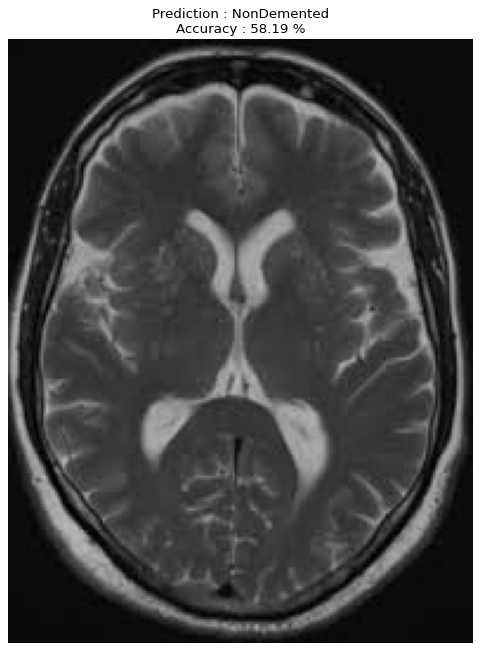

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
path = 'images.jpg'
pred = learn.predict(path)
test_img = Image.open(path)
plt.imshow(test_img)
plt.axis("off")
accuracy_rate = np.round(max(pred[2]).item()*100.0,2)
plt.title("Prediction : {}\nAccuracy : {} %".format(pred[0],accuracy_rate))

In [ ]:
learn.export(os.path.abspath('./export.pkl'))

Text(0.5, 1.0, 'Prediction : VeryMildDemented\nAccuracy : 99.37 %')

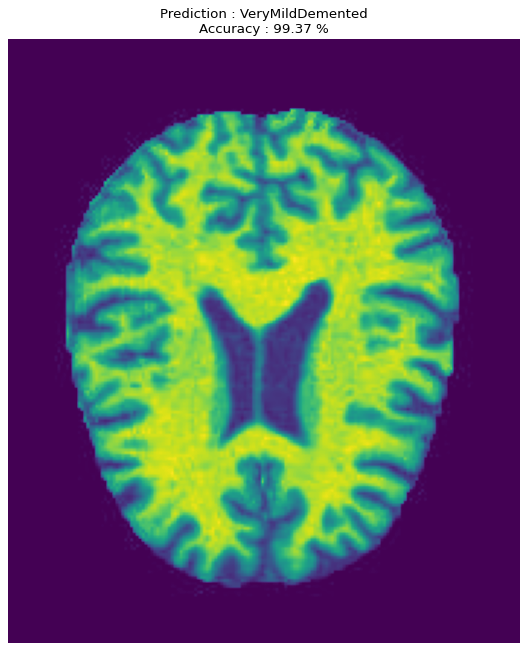

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
path = 'verymild (5).jpg'
pred = learn.predict(path)
test_img = Image.open(path)
plt.imshow(test_img)
plt.axis("off")
accuracy_rate = np.round(max(pred[2]).item()*100.0,2)
plt.title("Prediction : {}\nAccuracy : {} %".format(pred[0],accuracy_rate))

Text(0.5, 1.0, 'Prediction : NonDemented\nAccuracy : 99.13 %')

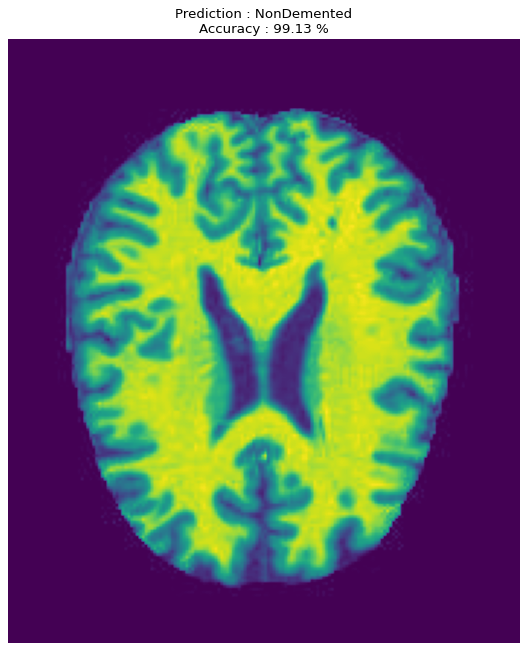

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
path = 'nondemented (5).jpg'
pred = learn.predict(path)
test_img = Image.open(path)
plt.imshow(test_img)
plt.axis("off")
accuracy_rate = np.round(max(pred[2]).item()*100.0,2)
plt.title("Prediction : {}\nAccuracy : {} %".format(pred[0],accuracy_rate))

Text(0.5, 1.0, 'Prediction : ModerateDemented\nAccuracy : 96.76 %')

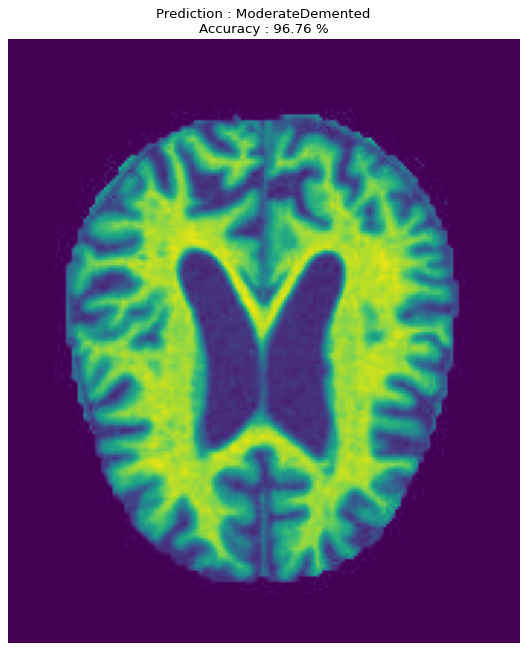

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
path = 'moderate (5).jpg'
pred = learn.predict(path)
test_img = Image.open(path)
plt.imshow(test_img)
plt.axis("off")
accuracy_rate = np.round(max(pred[2]).item()*100.0,2)
plt.title("Prediction : {}\nAccuracy : {} %".format(pred[0],accuracy_rate))

Text(0.5, 1.0, 'Prediction : MildDemented\nAccuracy : 97.6 %')

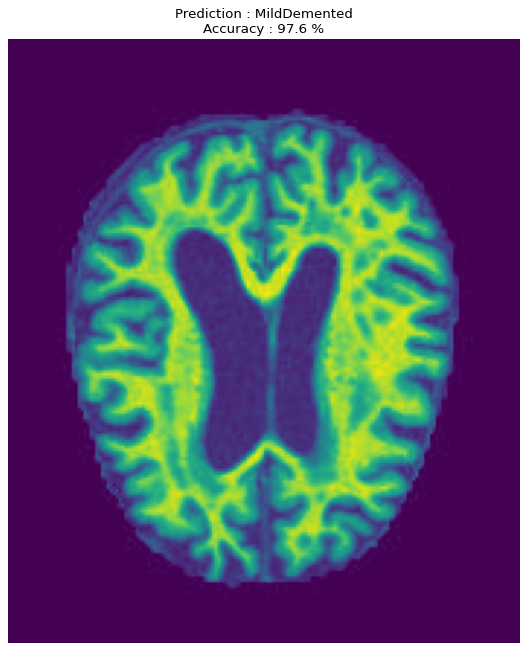

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
path = 'mild demented (5).jpg'
pred = learn.predict(path)
test_img = Image.open(path)
plt.imshow(test_img)
plt.axis("off")
accuracy_rate = np.round(max(pred[2]).item()*100.0,2)
plt.title("Prediction : {}\nAccuracy : {} %".format(pred[0],accuracy_rate))